In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

In [2]:
# Loading the diabetes dataset to a pandas DataFrame 
data = pd.read_csv('Diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 ---> Non-Diabetic
1 ---> Diabetic

In [12]:
df = data.groupby('Outcome').mean().T
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


In [13]:
df['%diff'] = (abs(df[0] - df[1])/((df[0]+ df[1])/2))*100
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [14]:
db = data.drop(columns ='Outcome', axis = 1)
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

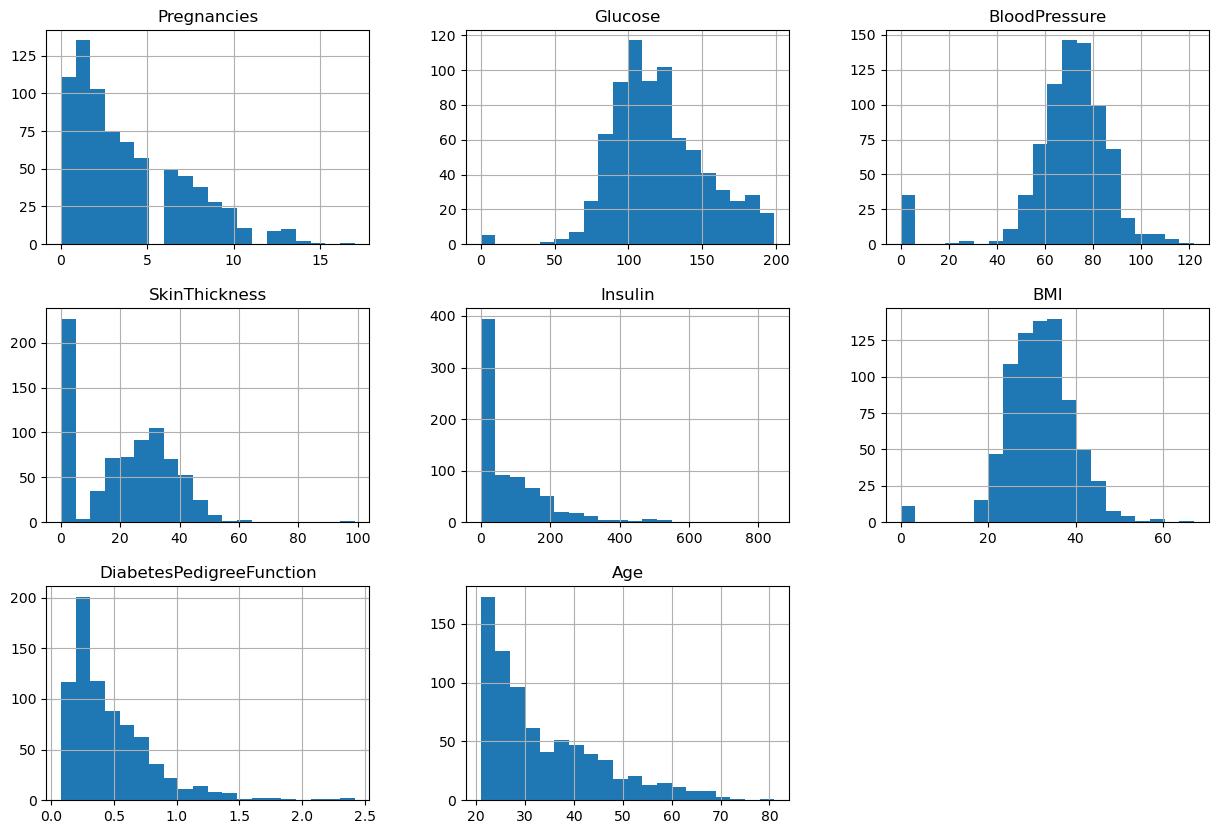

In [16]:
db.hist(bins =20, figsize=(15,10))
plt.show()

<Axes: >

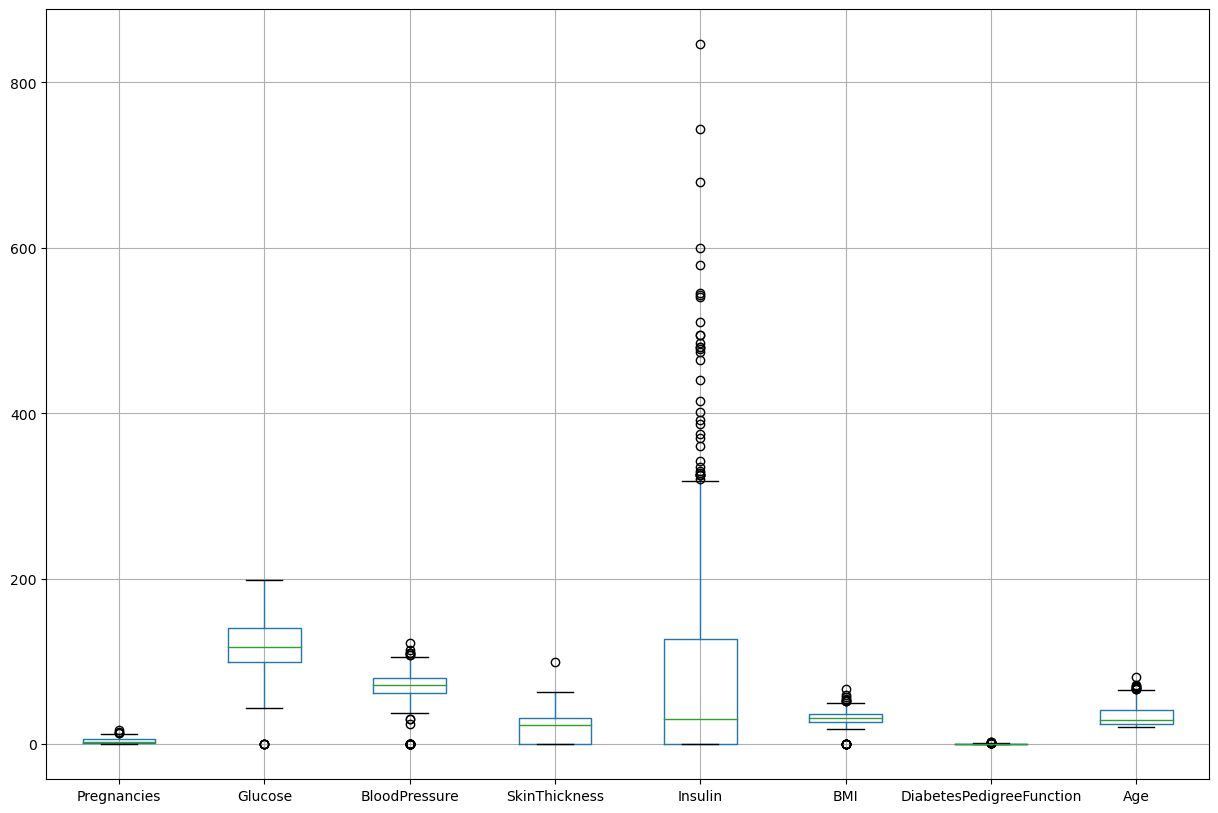

In [17]:
db.boxplot(figsize=(15,10))

In [18]:
corr_matrix = db.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

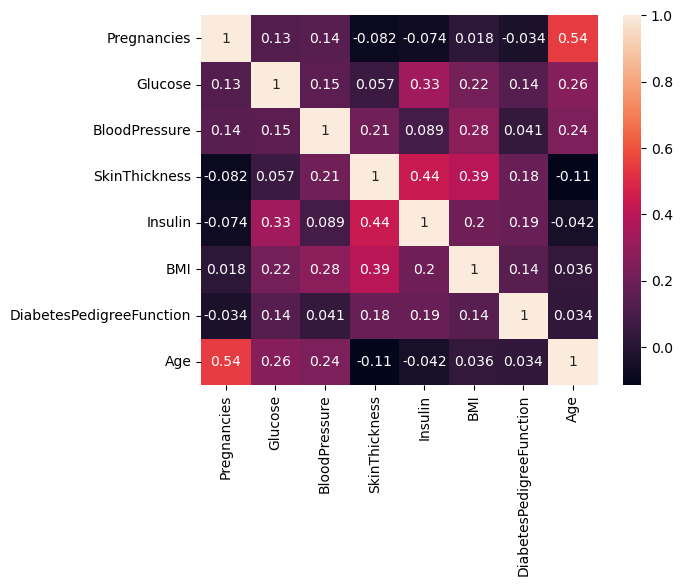

In [19]:
sns.heatmap(corr_matrix, annot = True)

In [20]:
# Separating the data and labels
x = data.drop(columns ='Outcome', axis =1)
y = data['Outcome']

In [21]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Feature Scaling 

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(x)

StandardScaler()

In [24]:
std_db = scaler.transform(x)

In [25]:
x_sc = scaler.fit_transform(x)

In [26]:
print(x_sc)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


Splitting the data into training and testing - Train Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size = 0.2, stratify = y, random_state = 42)

In [28]:
print(x.shape, x_train.shape, x_test.shape)

(768, 8) (614, 8) (154, 8)


Model Development

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
gbc = GradientBoostingClassifier()

In [31]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
svm.fit(x_train, y_train)
knn.fit(x_train, y_train)
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [33]:
ypredlr = lr.predict(x_test)
ypredlr1 = lr.predict(x_train)

In [34]:
ypreddt = dt.predict(x_test)
ypreddt1 = dt.predict(x_train)

In [35]:
ypredrf = rf.predict(x_test)
ypredrf1 = rf.predict(x_train)

In [36]:
ypredsvm = svm.predict(x_test)
ypredsvm1 = svm.predict(x_train)

In [37]:
ypredknn = knn.predict(x_test)
ypredknn1 = knn.predict(x_train)

In [38]:
ypredgbc = gbc.predict(x_test)
ypredgbc1 = gbc.predict(x_train)

In [39]:
lr_as = accuracy_score(y_test, ypredlr)
dt_as = accuracy_score(y_test, ypreddt)
rf_as = accuracy_score(y_test, ypredrf)
svm_as = accuracy_score(y_test, ypredsvm)
knn_as = accuracy_score(y_test, ypredknn)
gbc_as = accuracy_score(y_test, ypredgbc)

In [40]:
training_accuracies = [
    accuracy_score(y_train, ypredlr1),
    accuracy_score(y_train, ypreddt1),
    accuracy_score(y_train, ypredrf1),
    accuracy_score(y_train, ypredsvm1),
    accuracy_score(y_train, ypredknn1),
    accuracy_score(y_train, ypredgbc1),
]

In [41]:
testing_accuracies = [
    accuracy_score(y_test, ypredlr),
    accuracy_score(y_test, ypreddt),
    accuracy_score(y_test, ypredrf),
    accuracy_score(y_test, ypredsvm),
    accuracy_score(y_test, ypredknn),
    accuracy_score(y_test, ypredgbc),
]

In [42]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN', 'Gradient Boosting']
accuracy_df = pd.DataFrame({
    'Model': models,
    'Training Accuracy': training_accuracies,
    'Testing Accuracy': testing_accuracies
})

In [43]:
accuracy_df

,Model,Training Accuracy,Testing Accuracy
0,Logistic Regression,0.791531,0.714286
1,Decision Tree,1.000000,0.720779
2,Random Forest,1.000000,0.727273
3,SVM,0.835505,0.746753
4,KNN,0.802932,0.707792
5,Gradient Boosting,0.918567,0.753247


In [44]:
reports = {
    'Logistic Regression': classification_report(y_test, ypredlr, output_dict=True),
    'Decision Tree': classification_report(y_test, ypreddt, output_dict=True),
    'Random Forest': classification_report(y_test, ypredrf, output_dict=True),
    'SVM': classification_report(y_test, ypredsvm, output_dict=True),
    'KNN': classification_report(y_test, ypredknn, output_dict=True),
    'Gradient Boosting': classification_report(y_test, ypredgbc, output_dict=True)
}

In [45]:
report_df = pd.DataFrame()

In [46]:
for model, report in reports.items():
    model_df = pd.DataFrame(report).transpose()  # Convert each report to DataFrame
    model_df['Model'] = model  # Add model name as a column
    report_df = pd.concat([report_df, model_df], axis=0)  # Append to the combined DataFrame


In [47]:
# Reset index for cleaner display
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'Metric'}, inplace=True)

In [48]:
print(report_df)

          Metric  precision    recall  f1-score     support  \
0              0   0.759259  0.820000  0.788462  100.000000   
1              1   0.608696  0.518519  0.560000   54.000000   
2       accuracy   0.714286  0.714286  0.714286    0.714286   
3      macro avg   0.683977  0.669259  0.674231  154.000000   
4   weighted avg   0.706464  0.714286  0.708352  154.000000   
5              0   0.743590  0.870000  0.801843  100.000000   
6              1   0.648649  0.444444  0.527473   54.000000   
7       accuracy   0.720779  0.720779  0.720779    0.720779   
8      macro avg   0.696119  0.657222  0.664658  154.000000   
9   weighted avg   0.710299  0.720779  0.705635  154.000000   
10             0   0.778846  0.810000  0.794118  100.000000   
11             1   0.620000  0.574074  0.596154   54.000000   
12      accuracy   0.727273  0.727273  0.727273    0.727273   
13     macro avg   0.699423  0.692037  0.695136  154.000000   
14  weighted avg   0.723147  0.727273  0.724702  154.00

Cross Validation

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv =StratifiedKFold(n_splits=5, shuffle = True, random_state = 42)

In [50]:
lr_cv=cross_val_score(lr, x_sc,y, cv=cv, scoring='accuracy').mean()
dt_cv = cross_val_score(dt, x_sc, y, cv=cv, scoring='accuracy').mean()
rf_cv = cross_val_score(rf, x_sc, y, cv=cv, scoring='accuracy').mean()
svm_cv = cross_val_score(svm, x_sc, y, cv=cv, scoring='accuracy').mean()
knn_cv = cross_val_score(knn, x_sc, y, cv=cv, scoring='accuracy').mean()
gbc_cv = cross_val_score(gbc, x_sc, y, cv=cv, scoring='accuracy').mean()

In [51]:
cv_results = {
    'Logistic Regression': lr_cv,
    'Decision Tree': dt_cv,
    'Random Forest': rf_cv,
    'SVM': svm_cv,
    'KNN': knn_cv,
    'Gradient Boosting': gbc_cv
}

In [52]:
# Display the results
for model, score in cv_results.items():
    print(f"{model}: {score:.4f}")

Logistic Regression: 0.7747
Decision Tree: 0.6757
Random Forest: 0.7603
SVM: 0.7604
KNN: 0.7291
Gradient Boosting: 0.7591


In [53]:
cv_df = pd.DataFrame(cv_results.items(), columns=['Model', 'Mean Accuracy'])

In [54]:
print(cv_df)

                 Model  Mean Accuracy
0  Logistic Regression       0.774697
1        Decision Tree       0.675715
2        Random Forest       0.760343
3                  SVM       0.760377
4                  KNN       0.729132
5    Gradient Boosting       0.759087


Predictive Model Using SVM

In [55]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [56]:
preg = int(input("Enter the Preganancies = ",))
gcs = float(input('Enter the Glucose = ',))
bp = float(input('Enter the Blood Pressure =',))
st = float(input('Enter the Ski Thickness =',))
ins = float(input('Enter the Insulin =',))
bmi = float(input('Enter the bmi = ',))
dpf = float(input('Enter the Diabetes Pedigree Function = ',))
age = float(input('Enter the age = ',))

patients_data = [preg, gcs,bp,st,ins,bmi,dpf,age]
patients_data

Enter the Preganancies = 3
Enter the Glucose = 150
Enter the Blood Pressure =110
Enter the Ski Thickness =3
Enter the Insulin =150
Enter the bmi = 29
Enter the Diabetes Pedigree Function = 0.6
Enter the age = 45


[3, 150.0, 110.0, 3.0, 150.0, 29.0, 0.6, 45.0]

In [57]:
# Converting the data into an array
input_array = np.array(patients_data)
input_array_rs = input_array.reshape(1,-1)
input_array_rs

array([[  3. , 150. , 110. ,   3. , 150. ,  29. ,   0.6,  45. ]])

In [58]:
std_data = scaler.transform(input_array_rs)
std_data

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.25095213,  0.91091809,  2.11415525, -1.10002803,  0.60954382,
        -0.37981576,  0.38694877,  1.00055664]])

In [59]:
prediction = svm.predict(std_data)
prediction

array([1], dtype=int64)

In [60]:
prediction[0]

1

In [61]:
if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic


Predictive System

Predictive system using svm

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
preg = int(input("Enter the Preganancies = ",))
gcs = float(input('Enter the Glucose = ',))
bp = float(input('Enter the Blood Pressure =',))
st = float(input('Enter the Ski Thickness =',))
ins = float(input('Enter the Insulin =',))
bmi = float(input('Enter the bmi = ',))
dpf = float(input('Enter the Diabetes Pedigree Function = ',))
age = float(input('Enter the age = ',))

patients_data = [preg, gcs,bp,st,ins,bmi,dpf,age]

Enter the Preganancies = 3
Enter the Glucose = 150
Enter the Blood Pressure =110
Enter the Ski Thickness =3
Enter the Insulin =150
Enter the bmi = 29
Enter the Diabetes Pedigree Function = 0.5
Enter the age = 27


In [64]:
input_array = np.array(patients_data)
input_array_rs = input_array.reshape(1,-1)
std_data = scaler.transform(input_array_rs)
prediction = svm.predict(std_data)

In [65]:
if (prediction[0] == 0):
    print('Result - Negative')
    print('The person is not diabetic')
else:
    print('Result - Positive')
    print('The person is diabetic')

Result - Negative
The person is not diabetic
